## Inicialização

In [92]:
# Carregando todas as bibliotecas
import pandas as pd
import seaborn as sns 
from matplotlib import pyplot as plt
import numpy as np
from math import factorial
from scipy import stats

## Carregue os dados

In [93]:
# Carregue os arquivos de dados em diferentes DataFrames
df1 = pd.read_csv('vendas_linha_petshop_2019.csv', encoding='utf-8', sep=';')
df2 = pd.read_csv('vendas_linha_petshop_2020.csv', encoding='utf-8', sep=';')
df3 = pd.read_csv('vendas_linha_petshop_2021.csv', encoding='utf-8', sep=';')
df4 = pd.read_csv('vendas_linha_petshop_2022.csv', encoding='utf-8', sep=';')

## Prepare os dados

In [94]:
# Concatenando os DataFrames
df = pd.concat([df1, df2, df3, df4], ignore_index=True)

In [95]:
# Imprima as informações gerais/resumidas sobre o DataFrame dos planos
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200786 entries, 0 to 200785
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype 
---  ------               --------------   ----- 
 0   cod_pedido           200786 non-null  int64 
 1   regiao_pais          200786 non-null  object
 2   produto              200786 non-null  object
 3   valor                200786 non-null  object
 4   quantidade           200266 non-null  object
 5   valor_total_bruto    200786 non-null  object
 6   data                 200786 non-null  object
 7   estado               200786 non-null  object
 8   formapagto           200786 non-null  object
 9   centro_distribuicao  200786 non-null  object
 10  responsavelpedido    200786 non-null  object
 11  valor_comissao       200786 non-null  object
 12  lucro_liquido        200786 non-null  object
 13  categoriaprod        200786 non-null  object
dtypes: int64(1), object(13)
memory usage: 21.4+ MB


In [96]:
# Imprima uma amostra de dados dos planos
df.head()

,cod_pedido,regiao_pais,produto,valor,quantidade,valor_total_bruto,data,estado,formapagto,centro_distribuicao,responsavelpedido,valor_comissao,lucro_liquido,categoriaprod
0,1,Norte,Biscoito True Champion 300g,22,2.0,44,13/06/2019,Acre,Dinheiro,Rapid Pink,Carlos,"0,44","17,6",Alimentação
1,2,Norte,Biscoito True Champion 300g,21,2.0,42,03/01/2019,Amapá,Pix,Rapid Pink,Maria Linda,"0,42","16,8",Alimentação
2,3,Norte,Biscoito True Champion 300g,22,NaN,44,18/01/2019,Pará,Boleto Bancário,Rapid Pink,Julia,"0,88","35,2",Alimentação
3,4,Norte,Biscoito True Champion 300g,19,4.0,88,19/08/2019,Rondônia,Boleto Bancário,Rapid Pink,Yuri,"0,76","30,4",Alimentação
4,5,Norte,Biscoito True Champion 300g,22,2.0,44,18/10/2019,Tocantins,Cartão Crédito,Rapid Pink,Dolores,"0,44","17,6",Alimentação


## Corrija os dados

In [97]:
# Remove colunas que têm todos os valores NaN ou em falta
df.dropna(inplace=True)

In [98]:
#Verificando se há linhas completamente duplicadas
print("os valores duplicados são:", df.duplicated().sum())
print()
print(df[df.duplicated()])

os valores duplicados são: 0

Empty DataFrame
Columns: [cod_pedido, regiao_pais, produto, valor, quantidade, valor_total_bruto, data, estado, formapagto, centro_distribuicao, responsavelpedido, valor_comissao, lucro_liquido, categoriaprod]
Index: []


## Ajustar Tipos de Dados

In [99]:
# Convertendo colunas numéricas para float
cols_numericas = ['valor', 'quantidade', 'valor_total_bruto', 'valor_comissao', 'lucro_liquido']

for col in cols_numericas:
    df[col] = pd.to_numeric(df[col], errors='coerce')

# Verificando se as conversões foram bem-sucedidas
print(df.dtypes)

cod_pedido               int64
regiao_pais             object
produto                 object
valor                  float64
quantidade             float64
valor_total_bruto      float64
data                    object
estado                  object
formapagto              object
centro_distribuicao     object
responsavelpedido       object
valor_comissao         float64
lucro_liquido          float64
categoriaprod           object
dtype: object


In [100]:
# Resetando o índice após remover linhas
df.reset_index(drop=True, inplace=True)

In [101]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200266 entries, 0 to 200265
Data columns (total 14 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   cod_pedido           200266 non-null  int64  
 1   regiao_pais          200266 non-null  object 
 2   produto              200266 non-null  object 
 3   valor                51747 non-null   float64
 4   quantidade           200119 non-null  float64
 5   valor_total_bruto    52350 non-null   float64
 6   data                 200266 non-null  object 
 7   estado               200266 non-null  object 
 8   formapagto           200266 non-null  object 
 9   centro_distribuicao  200266 non-null  object 
 10  responsavelpedido    200266 non-null  object 
 11  valor_comissao       2256 non-null    float64
 12  lucro_liquido        36846 non-null   float64
 13  categoriaprod        200266 non-null  object 
dtypes: float64(5), int64(1), object(8)
memory usage: 21.4+ MB


## Encontrando os outliers na coluna quantidade

In [102]:
# Definir os limites de outliers usando o método do IQR
Q1 = df['quantidade'].quantile(0.25)  # Primeiro quartil
Q3 = df['quantidade'].quantile(0.75)  # Terceiro quartil
IQR = Q3 - Q1  # Intervalo interquartil

# Definir limites para outliers
limite_inferior = Q1 - 1.5 * IQR
limite_superior = Q3 + 1.5 * IQR

# Filtrar os outliers
outliers = df[(df['quantidade'] < limite_inferior) | (df['quantidade'] > limite_superior)]

# Exibir a quantidade de outliers encontrados
print(f"Número de outliers na coluna 'quantidade': {len(outliers)}")

Número de outliers na coluna 'quantidade': 11283


## Analisando o impacto dos outliers nas vendas

In [103]:
# Média das vendas com outliers
media_com_outliers = df['valor_total_bruto'].mean()

# Criar um DataFrame sem os outliers
df_sem_outliers = df[(df['quantidade'] >= limite_inferior) & (df['quantidade'] <= limite_superior)]

# Média das vendas sem outliers
media_sem_outliers = df_sem_outliers['valor_total_bruto'].mean()

print(f"Média das vendas (com outliers): {media_com_outliers:.2f}")
print(f"Média das vendas (sem outliers): {media_sem_outliers:.2f}")

Média das vendas (com outliers): 568.16
Média das vendas (sem outliers): 319.91


## Calculando a Variabilidade dos Dados Ignorando os Outliers

In [104]:
# Desvio padrão das vendas sem outliers
desvio_padrao = df_sem_outliers['valor_total_bruto'].std()

# Coeficiente de variação (CV) = Desvio padrão / Média
cv = desvio_padrao / df_sem_outliers['valor_total_bruto'].mean()

# Amplitude interquartil (IQR)
Q1_sem = df_sem_outliers['valor_total_bruto'].quantile(0.25)
Q3_sem = df_sem_outliers['valor_total_bruto'].quantile(0.75)
IQR_sem = Q3_sem - Q1_sem

# Exibir os resultados
print(f"Desvio padrão das vendas (sem outliers): {desvio_padrao:.2f}")
print(f"Coeficiente de variação (sem outliers): {cv:.2%}")
print(f"Amplitude interquartil (IQR) das vendas (sem outliers): {IQR_sem:.2f}")

Desvio padrão das vendas (sem outliers): 19789.14
Coeficiente de variação (sem outliers): 6185.84%
Amplitude interquartil (IQR) das vendas (sem outliers): 62.00


## Teste de Hipótese: Média de Preços por Região vs. Média Geral

In [105]:
# Remover valores NaN na coluna 'valor'
df_sem_outliers = df_sem_outliers.dropna(subset=['valor'])

# Média geral dos preços
media_geral = df_sem_outliers['valor'].mean()

### Hipóteses:

H₀ (Hipótese Nula): A média dos preços em cada região é igual à média geral.

H₁ (Hipótese Alternativa): A média dos preços em pelo menos uma região é diferente da média geral.

### teste t por região

In [106]:
# Média geral dos preços
media_geral = df_sem_outliers['valor'].mean()

# Criar um dicionário para armazenar os resultados por região
resultados_regiao = {}

for regiao, grupo in df_sem_outliers.groupby('regiao_pais'):
    stat, p_value = stats.ttest_1samp(grupo['valor'], media_geral)
    resultados_regiao[regiao] = p_value

# Exibir os resultados
for regiao, p in resultados_regiao.items():
    resultado = "Rejeita H₀ (diferença significativa)" if p < 0.05 else "Não rejeita H₀ (sem diferença significativa)"
    print(f"Região: {regiao} | p-valor: {p:.5f} | {resultado}")

Região: Centro Oeste | p-valor: 0.74499 | Não rejeita H₀ (sem diferença significativa)
Região: Nordeste | p-valor: 0.81259 | Não rejeita H₀ (sem diferença significativa)
Região: Norte | p-valor: 0.99952 | Não rejeita H₀ (sem diferença significativa)
Região: Sudeste | p-valor: 0.79856 | Não rejeita H₀ (sem diferença significativa)
Região: Sul | p-valor: 0.77760 | Não rejeita H₀ (sem diferença significativa)


## Teste de Hipótese: Média de Preços por Forma de Pagamento vs. Média Geral

### Hipóteses:

H₀ (Hipótese Nula): A média dos preços em cada forma de pagamento é igual à média geral.

H₁ (Hipótese Alternativa): A média dos preços em pelo menos uma forma de pagamento é diferente da média geral.

### teste t por forma de pagamento

In [107]:
# Criar um dicionário para armazenar os resultados por forma de pagamento
resultados_pagamento = {}

for pagamento, grupo in df_sem_outliers.groupby('formapagto'):
    stat, p_value = stats.ttest_1samp(grupo['valor'], media_geral)
    resultados_pagamento[pagamento] = p_value

# Exibir os resultados
for pagamento, p in resultados_pagamento.items():
    resultado = "Rejeita H₀ (diferença significativa)" if p < 0.05 else "Não rejeita H₀ (sem diferença significativa)"
    print(f"Forma de Pagamento: {pagamento} | p-valor: {p:.5f} | {resultado}")

Forma de Pagamento: Boleto Bancário | p-valor: 0.82469 | Não rejeita H₀ (sem diferença significativa)
Forma de Pagamento: Cartão Crédito | p-valor: 0.25028 | Não rejeita H₀ (sem diferença significativa)
Forma de Pagamento: Cartão Débito | p-valor: 0.38563 | Não rejeita H₀ (sem diferença significativa)
Forma de Pagamento: Dinheiro | p-valor: 0.38570 | Não rejeita H₀ (sem diferença significativa)
Forma de Pagamento: Pix | p-valor: 0.68952 | Não rejeita H₀ (sem diferença significativa)


### Interpretação dos Resultados
Se p < 0.05, rejeitamos a hipótese nula e concluímos que a média do grupo é significativamente diferente da média geral.

Se p ≥ 0.05, não há diferença estatisticamente significativa.

## Calculando a Matriz de Correlação

In [108]:
# Selecionando apenas colunas numéricas para calcular a correlação
correlacao = df_sem_outliers[['valor', 'quantidade', 'valor_total_bruto', 'valor_comissao', 'lucro_liquido']].corr()

# Exibir a matriz de correlação
print(correlacao)

                      valor  quantidade  valor_total_bruto  valor_comissao  \
valor              1.000000   -0.114768           0.042358        0.935674   
quantidade        -0.114768    1.000000           0.002573       -0.057014   
valor_total_bruto  0.042358    0.002573           1.000000        0.898261   
valor_comissao     0.935674   -0.057014           0.898261        1.000000   
lucro_liquido      0.760086    0.243796           0.026457        0.740181   

                   lucro_liquido  
valor                   0.760086  
quantidade              0.243796  
valor_total_bruto       0.026457  
valor_comissao          0.740181  
lucro_liquido           1.000000  


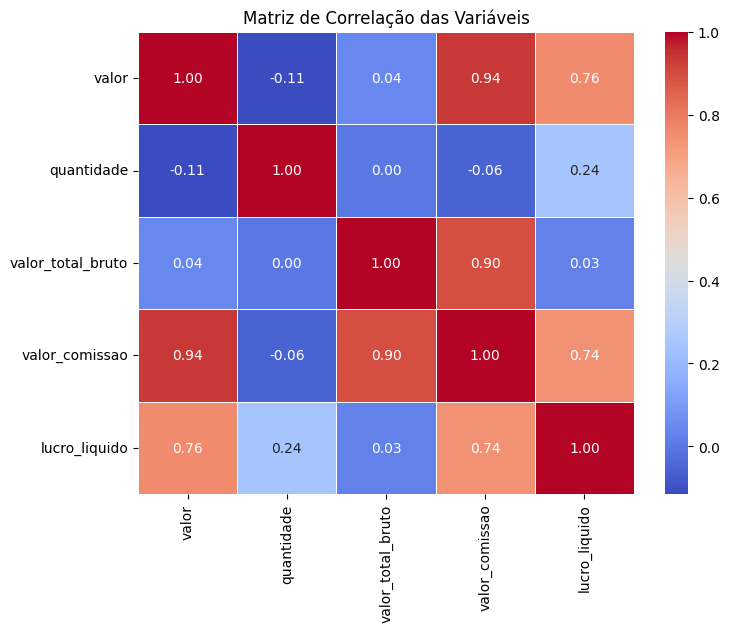

In [109]:
# Criar uma figura para o heatmap
plt.figure(figsize=(8, 6))

# Criar o mapa de calor da matriz de correlação
sns.heatmap(correlacao, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)

# Adicionar título ao gráfico
plt.title('Matriz de Correlação das Variáveis')

# Salvar a imagem
plt.savefig('matriz_correlacao.png')

# Exibir o gráfico
plt.show()

### Principais Observações:
Correlação alta entre valor e valor_comissao (0.94)

Isso sugere que a comissão é fortemente influenciada pelo valor do produto. Quanto mais caro o produto, maior a comissão.
Correlação alta entre valor_total_bruto e valor_comissao (0.90)

Indica que o total bruto de vendas está intimamente ligado à comissão paga.
Correlação moderada entre lucro_liquido e valor (0.76)

Produtos mais caros tendem a gerar mais lucro líquido, mas essa relação não é perfeita.
Correlação baixa entre quantidade e lucro_liquido (0.24)

Sugere que vender mais unidades nem sempre se traduz em mais lucro, o que pode indicar variações de margem de lucro entre os produtos.
Correlação praticamente nula entre quantidade e valor_total_bruto (-0.00)

Isso pode significar que o total bruto de vendas não depende muito do número de unidades vendidas, mas sim do preço individual dos produtos.

## Conclusão

Concatenamos os dataframes;

Dropamos as linhas com valores ausentes e NaN;

Corrijimos os Datatypes;

Conferimos se havia linhas duplicadas;

Separamos as outliers;

Realizamos os t-tests;

Realizamos a matriz de correlação;

### Respondendo as perguntas sobre python que foram colocadas no capítulo 1
Analise os dados na perspectiva da coluna quantidade. Existem outliers nos dados disponibilizados? É possível identificar algo em relação às vendas associadas a estes outliers? Justifique sua resposta. Calcule uma estimativa de variabilidade que ignore o efeito desses outliers.

Sim, há 11283 outliers nos dados disponibilizados. Sim, é possível identificar algo em relação às vendas associadas aos outliers, com os outliers a média das vendas sobe para 568.16 enquanto a média das vendas sem os outliers é de 319.91, para calcular essa média usamos a coluna valor_total_bruto. Aqui está uma estimativa de variabilidade que ignore o efeito desses outliers

Desvio padrão das vendas (sem outliers): 19789.14
Coeficiente de variação (sem outliers): 6185.84%
Amplitude interquartil (IQR) das vendas (sem outliers): 62.00

Em relação à média de preço, há diferença estatisticamente significativa entre a média de preço de alguma região e a média da população? E em relação à média de preço de alguma modalidade de pagamento e à média da população? Justifique a hipótese.

Não há diferença estatisticamente significativa entre a média de preço de qualquer região e a média da população, Isso significa que não há evidências estatísticas suficientes para afirmar que a média de preços de alguma região é diferente da média geral, ou seja, não devemos rejeitar a hipótese nula, A média dos preços em cada região é igual à média geral.

Calcule a matriz de correlação dos dados fornecidos. Quais as variáveis que apresentam forte correlação positiva ou negativa? Acrescente a matriz de correlação como uma imagem e anexe-a ao seu relatório.

Essa resposta estará 2 markdowns acima 